<a href="https://colab.research.google.com/github/OscarSantos98/Calidad_del_aire/blob/main/Taller_Calidad_del_Aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 Datos Abiertos: Calidad del aire

### Copyright

MIT License

Copyright (c) 2021 OscarSantos98

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Parte 1 del taller: Aprendiendo a graficar datos en Python

## Paso 1: Importar librerías.
Importa las librerías que se van a utilizar, tanto para graficar como para leer archivos del tipo csv.

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

## Paso 2: Importar archivos.
Importa el archivo o los archivos donde están almacenados tus datos. Estos pueden ser de cualquier tipo pero en este caso se utilizarán archivos csv.

In [2]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-12-01_2020-12-31.csv

--2021-03-06 07:02:11--  https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-12-01_2020-12-31.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1265974 (1.2M) [text/plain]
Saving to: ‘Datos_Particulas_2020-12-01_2020-12-31.csv’

Datos_Particulas_20 100%[===================>]   1.21M  --.-KB/s    in 0.06s   

2021-03-06 07:02:11 (21.5 MB/s) - ‘Datos_Particulas_2020-12-01_2020-12-31.csv’ saved [1265974/1265974]



## Paso 3: Leer datos.
Lectura de datos desde archivo csv cargado en el paso anterior.

In [3]:
csv_data = pd.read_csv('Datos_Particulas_2020-12-01_2020-12-31.csv')

Lee los encabezados de las columnas

In [4]:
csv_data.columns.tolist()

['Fecha',
 'Hora',
 'Ozono ppm',
 'Ozono ppb',
 'Dióxido de azufre ppm',
 'Dióxido de azufre ppb',
 'Partículas PM 1.0 µg/m3',
 'Partículas PM 2.5 µg/m3',
 'Partículas PM 10 µg/m3']

Obtén una vista previa de tu conjunto de datos.

In [5]:
csv_data.head()

,Fecha,Hora,Ozono ppm,Ozono ppb,Dióxido de azufre ppm,Dióxido de azufre ppb,Partículas PM 1.0 µg/m3,Partículas PM 2.5 µg/m3,Partículas PM 10 µg/m3
0,2020-12-01,00:03,0.000000,0.000000,0.291326,291.32631,3.05,6.80,15.240000
1,2020-12-01,00:05,0.000000,0.000000,0.282270,282.26981,2.82,5.62,14.210000
2,2020-12-01,00:07,0.000000,0.000000,0.287851,287.85056,2.99,5.53,7.630000
3,2020-12-01,00:10,0.000000,0.000000,0.255981,255.98142,2.12,4.05,5.030000
4,2020-12-01,00:12,0.007116,7.115505,0.272087,272.08734,3.23,6.51,16.459999


Entiende tus datos con la función describe.

In [6]:
csv_data.describe()

,Ozono ppm,Ozono ppb,Dióxido de azufre ppm,Dióxido de azufre ppb,Partículas PM 1.0 µg/m3,Partículas PM 2.5 µg/m3,Partículas PM 10 µg/m3
count,16705.000000,16705.000000,16705.000000,16705.000000,16705.000000,16705.000000,16705.000000
mean,0.004973,4.973117,0.290504,290.504038,2.395383,6.099334,19.143630
std,0.024071,24.070908,0.093231,93.230557,1.997133,4.422503,18.585462
min,0.000000,0.000000,0.144709,144.708560,0.050000,0.120000,0.120000
25%,0.000000,0.000000,0.265283,265.282690,1.240000,3.090000,6.540000
50%,0.000000,0.000000,0.277913,277.912880,1.940000,4.880000,13.540000
75%,0.005493,5.492670,0.294655,294.655230,2.980000,7.790000,26.039999
max,2.109622,2109.622500,9.903626,9903.626400,33.750000,71.040001,469.590000


## Paso 4. Graficar muestreo de datos.
Escoge la columna que se va graficar en el gráfico.

Para el caso partiular se escoge la fecha, hora y pm10.

In [7]:
fecha = csv_data['Fecha']
hora = csv_data['Hora']
pm10 = csv_data['Partículas PM 10 µg/m3']

Verifica que seleccionaste correctamente los datos que vas a graficar

In [8]:
fecha

0        2020-12-01
1        2020-12-01
2        2020-12-01
3        2020-12-01
4        2020-12-01
            ...    
16700    2020-12-31
16701    2020-12-31
16702    2020-12-31
16703    2020-12-31
16704    2020-12-31
Name: Fecha, Length: 16705, dtype: object

In [9]:
hora

0        00:03
1        00:05
2        00:07
3        00:10
4        00:12
         ...  
16700    22:49
16701    22:51
16702    22:54
16703    22:56
16704    22:58
Name: Hora, Length: 16705, dtype: object

In [10]:
pm10

0        15.240000
1        14.210000
2         7.630000
3         5.030000
4        16.459999
           ...    
16700    36.849998
16701    12.650000
16702     6.350000
16703    50.779999
16704    42.149998
Name: Partículas PM 10 µg/m3, Length: 16705, dtype: float64

Si en este momento se grafica una parte de los datos, se observa un detalle que veremos a continuación.

Para graficar basta con pensar que necesitamos 

```
plt.plot_date(x, y)
```



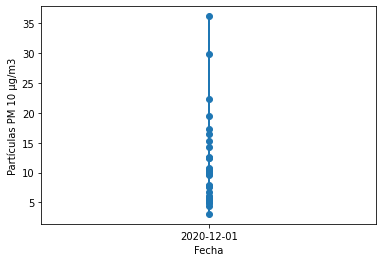

In [11]:
primeros_dias = fecha.iloc[:30]
primeros_pm10 = pm10.iloc[:30]
plt.plot_date(primeros_dias, primeros_pm10, linestyle='solid')
plt.xlabel('Fecha')
plt.ylabel('Partículas PM 10 µg/m3')
plt.show()

Al no incluir la hora en que se registró el pm10 todas las medidas aparecen en una sola línea ya que tienen la misma fecha y las primeras medidas corresponden al mismo día.

Para corregir esto debemos concatenar las columnas.

In [12]:
fecha = pd.to_datetime(csv_data['Fecha'].astype(str) + ' ' + csv_data['Hora'].astype(str), dayfirst=True)

Ahora volvemos a graficar los mismos días para verificar su funcionamiento.

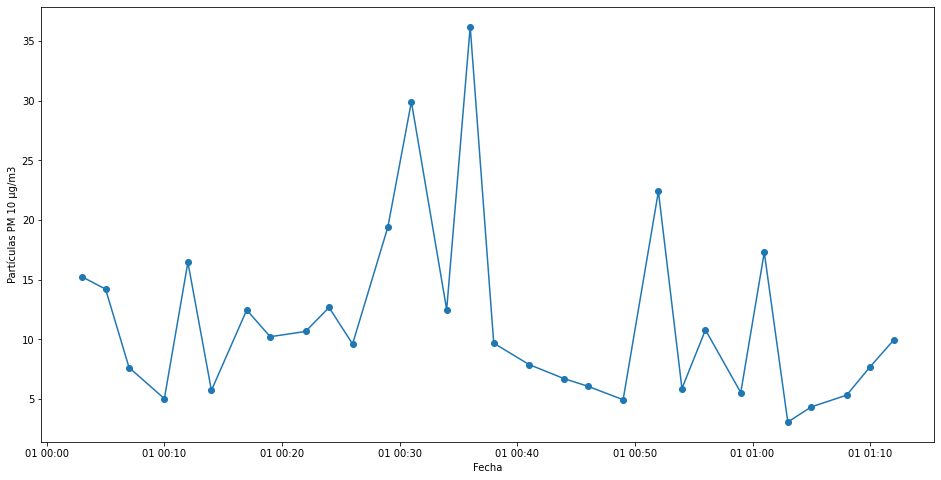

In [13]:
primeros_dias = fecha.iloc[:30]
primeros_pm10 = pm10.iloc[:30]
plt.figure(figsize=(16,8))
plt.plot_date(primeros_dias, primeros_pm10, linestyle='solid')
plt.xlabel('Fecha')
plt.ylabel('Partículas PM 10 µg/m3')
plt.show()

Ahora vemos que el eje X que es la fecha, ha cambiado a la hora. Esto podría ser ilustrativo según lo que se desea observar pero recordemos que si vamos a graficar los datos de todo un mes o todo un año sería más conveniente ver la fecha. Esto lo haremos con el conjunto de datos completo.

## Paso 5. Graficar todo el conjunto de datos.

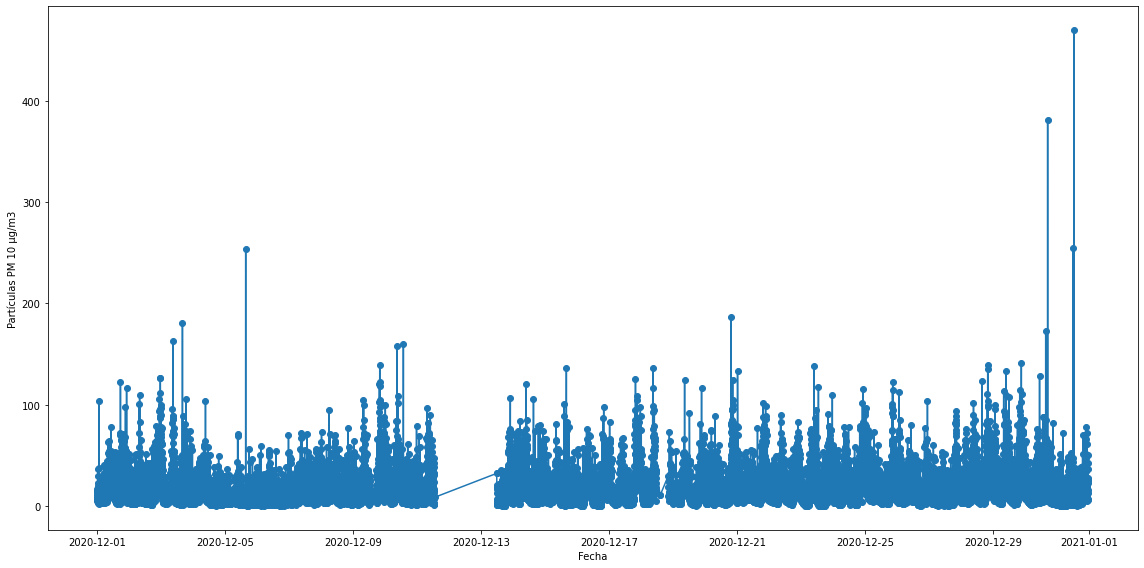

In [14]:
plt.figure(figsize=(16,8))
plt.plot_date(fecha, pm10, linestyle='solid')
plt.xlabel('Fecha')
plt.ylabel('Partículas PM 10 µg/m3')
plt.tight_layout()
plt.show()

Se observa que la cantidad de datos es inmensa y no es fácil de visualizar. De manera que debemos personalizarla

## Paso 6. Personalizar tu gráfica

Se pueden hacer bastantes cosas como [modificar el marcador](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), tamaño del marcador, color de marcador, tipo de línea, tamaño de la línea, etc.

La información de estos parámetros se puede consultar [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot_date.html)

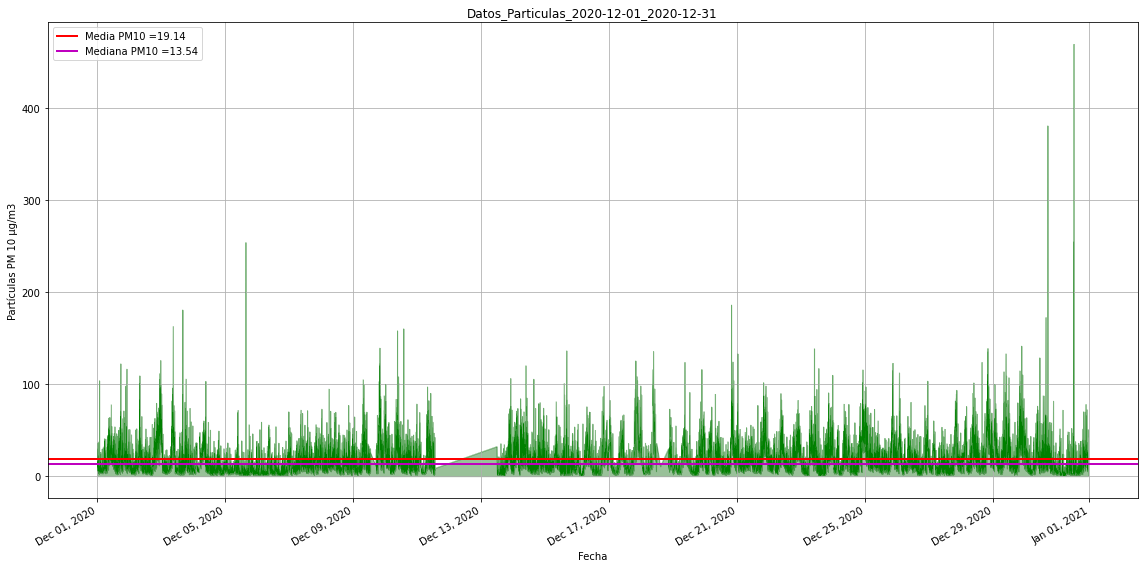

In [15]:
plt.figure(figsize=(16,8))
#plt.plot_date(fecha, pm10, linestyle='solid', marker=None)
#plt.plot_date(fecha, pm10, linestyle='solid', markersize=0)
plt.plot_date(fecha, pm10, linestyle='solid', linewidth=0.15, marker='', color='green')
plt.axhline(pm10.mean(), label=f'Media PM10 ={round(pm10.mean(),2)}', linewidth=2, color='r')
plt.axhline(pm10.median(), label=f'Mediana PM10 ={round(pm10.median(),2)}', linewidth=2, color='m')
plt.fill_between(fecha, pm10, color='darkgreen', alpha=0.4)
date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Datos_Particulas_2020-12-01_2020-12-31')
plt.xlabel('Fecha')
plt.ylabel('Partículas PM 10 µg/m3')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Para los colores también hay una página donde podemos consultar todas las opciones o bien especificar uno personalizado con hexadecimal.
Da clic [aquí](https://matplotlib.org/stable/gallery/color/named_colors.html) para abrir la liga.


Otra opción es elegir algun formato específico que nos proporciona matplotlib.

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Para definir un estilo escribimos lo siguiente.

In [17]:
plt.style.use('Solarize_Light2')

Y nuevamente graficamos.

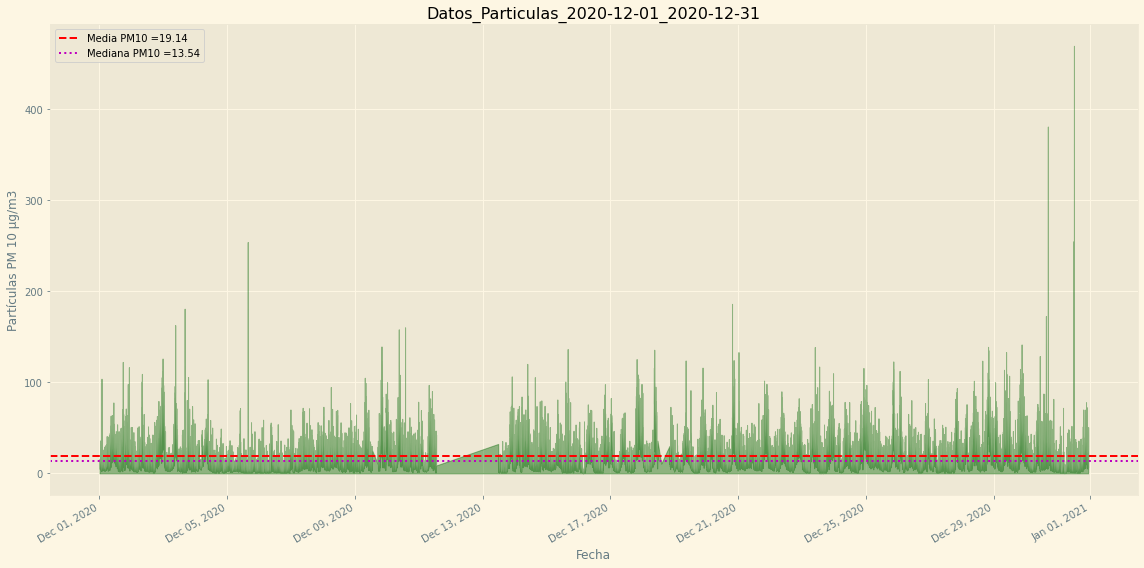

In [18]:
plt.figure(figsize=(16,8))
plt.plot_date(fecha, pm10, linewidth=0.15, marker=None)
plt.axhline(pm10.mean(), linestyle='--', label=f'Media PM10 ={round(pm10.mean(),2)}', linewidth=2, c='r')
plt.axhline(pm10.median(), linestyle=':', label=f'Mediana PM10 ={round(pm10.median(),2)}', linewidth=2, c='m')
plt.fill_between(fecha, pm10, color='darkgreen', alpha=0.4)
date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Datos_Particulas_2020-12-01_2020-12-31')
plt.xlabel('Fecha')
plt.ylabel('Partículas PM 10 µg/m3')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Parte 2 del taller: Graficando datos de sensores ubicados en León, Guanajuato para la obtención de la calidad del aire.
Ahora que hemos aprendido cómo se grafica vamos a pasar a graficar todo nuestro conjunto de datos.

Nuevamente repitiendo los primeros 3 pasos y simplificando los últimos en 3 en uno solo.

## Paso 1. Importar librerías.

In [19]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from collections import Counter

## Paso 2. Importar archivos

In [20]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-01-15_2020-01-30.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-03-16_2020-04-15.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-11-01_2020-11-30.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-12-01_2020-12-31.csv

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-01-15_2020-01-30.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-03-16_2020-04-15.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-11-01_2020-11-30.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Particulas_2020-12-01_2020-12-31.csv

--2021-03-06 07:02:14--  https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-01-15_2020-01-30.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712024 (695K) [text/plain]
Saving to: ‘Datos_Climatologicos_2020-01-15_2020-01-30.csv’

Datos_Climatologico 100%[===================>] 695.34K  --.-KB/s    in 0.05s   

2021-03-06 07:02:14 (15.0 MB/s) - ‘Datos_Climatologicos_2020-01-15_2020-01-30.csv’ saved [712024/712024]

--2021-03-06 07:02:14--  https://raw.githubusercontent.com/OscarSantos98/Calidad_del_aire/main/data/Datos_Climatologicos_2020-03-16_2020-04-15.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubuserc

## Paso 3. Leer datos

In [21]:
particulas_noviembre = pd.read_csv('Datos_Particulas_2020-11-01_2020-11-30.csv', engine='python', skip_blank_lines=False)
particulas_diciembre = pd.read_csv('Datos_Particulas_2020-12-01_2020-12-31.csv', engine='python', skip_blank_lines=False)
particulas_enero_feria = pd.read_csv('Datos_Particulas_2020-01-15_2020-01-30.csv', engine='python', skip_blank_lines=False)
particulas_marzo_feria = pd.read_csv('Datos_Particulas_2020-03-16_2020-04-15.csv', engine='python', skip_blank_lines=False)
climatologicos_noviembre = pd.read_csv('Datos_Climatologicos_2020-11-01_2020-11-30.csv', engine='python', skip_blank_lines=False)
climatologicos_diciembre = pd.read_csv('Datos_Climatologicos_2020-12-01_2020-12-31.csv', engine='python', skip_blank_lines=False)
climatologicos_enero_feria = pd.read_csv('Datos_Climatologicos_2020-01-15_2020-01-30.csv', engine='python', skip_blank_lines=False)
climatologicos_marzo_feria = pd.read_csv('Datos_Climatologicos_2020-03-16_2020-04-15.csv', engine='python', skip_blank_lines=False)

## Paso 4. Graficar datos

In [22]:
plt.style.use('seaborn')

Guardamos columnas en variables.

In [23]:
fecha_p_nov = pd.to_datetime(particulas_noviembre['Fecha'].astype(str) + ' ' + particulas_noviembre['Hora'].astype(str), dayfirst=True)
pm1_nov = particulas_noviembre['Partículas PM 1.0 µg/m3']
pm2_5_nov = particulas_noviembre['Partículas PM 2.5 µg/m3']
pm10_nov = particulas_noviembre['Partículas PM 10 µg/m3']

fecha_p_dic = pd.to_datetime(particulas_diciembre['Fecha'].astype(str) + ' ' + particulas_diciembre['Hora'].astype(str), dayfirst=True)
pm1_dic = particulas_diciembre['Partículas PM 1.0 µg/m3']
pm2_5_dic = particulas_diciembre['Partículas PM 2.5 µg/m3']
pm10_dic = particulas_diciembre['Partículas PM 10 µg/m3']

fecha_p_ene = pd.to_datetime(particulas_enero_feria['Fecha'].astype(str) + ' ' + particulas_enero_feria['Hora'].astype(str), dayfirst=True)
pm1_ene = particulas_enero_feria['Partículas PM 1.0 µg/m3']
pm2_5_ene = particulas_enero_feria['Partículas PM 2.5 µg/m3']
pm10_ene = particulas_enero_feria['Partículas PM 10 µg/m3']

fecha_p_mar = pd.to_datetime(particulas_marzo_feria['Fecha'].astype(str) + ' ' + particulas_marzo_feria['Hora'].astype(str), dayfirst=True)
pm1_mar = particulas_marzo_feria['Partículas PM 1.0 µg/m3']
pm2_5_mar = particulas_marzo_feria['Partículas PM 2.5 µg/m3']
pm10_mar = particulas_marzo_feria['Partículas PM 10 µg/m3']

fecha_c_nov = pd.to_datetime(climatologicos_noviembre['Fecha'].astype(str) + ' ' + climatologicos_noviembre['Hora'].astype(str), dayfirst=True)
temp_nov = climatologicos_noviembre['Temperatura °C']
rad_nov = climatologicos_noviembre['Radiacion UV umol * m-2 * s-1']
humed_nov = climatologicos_noviembre['Humedad relativa %RH']
direccion_nov = climatologicos_noviembre['Direccion del viento dato']

fecha_c_dic = pd.to_datetime(climatologicos_diciembre['Fecha'].astype(str) + ' ' + climatologicos_diciembre['Hora'].astype(str), dayfirst=True)
temp_dic = climatologicos_diciembre['Temperatura °C']
rad_dic = climatologicos_diciembre['Radiacion UV umol * m-2 * s-1']
humed_dic = climatologicos_diciembre['Humedad relativa %RH']
direccion_dic = climatologicos_diciembre['Direccion del viento dato']

fecha_c_ene = pd.to_datetime(climatologicos_enero_feria['Fecha'].astype(str) + ' ' + climatologicos_enero_feria['Hora'].astype(str), dayfirst=True)
temp_ene = climatologicos_enero_feria['Temperatura °C']
rad_ene = climatologicos_enero_feria['Radiacion UV umol * m-2 * s-1']
humed_ene = climatologicos_enero_feria['Humedad relativa %RH']
direccion_ene = climatologicos_enero_feria['Direccion del viento dato']

fecha_c_mar = pd.to_datetime(climatologicos_marzo_feria['Fecha'].astype(str) + ' ' + climatologicos_marzo_feria['Hora'].astype(str), dayfirst=True)
temp_mar = climatologicos_marzo_feria['Temperatura °C']
rad_mar = climatologicos_marzo_feria['Radiacion UV umol * m-2 * s-1']
humed_mar = climatologicos_marzo_feria['Humedad relativa %RH']
direccion_mar = climatologicos_marzo_feria['Direccion del viento dato']

### 4.1 Forma fácil pero lenta e ineficiente

Personalizamos y graficamos cada mes (Esto se copia y pega cambiando valores a propósito en este notebook para demostrar posteriormente que el ciclo for nos facilita hacer lo mismo pero escribiendo menos)

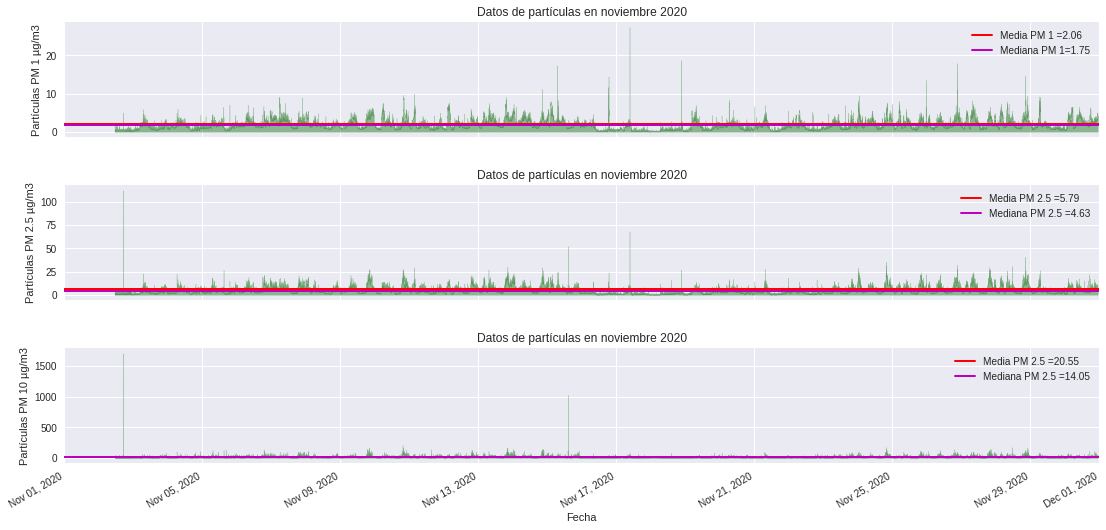

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

ax1.plot_date(fecha_p_nov, pm1_nov, linewidth=0.15, marker=None)
ax1.axhline(pm1_nov.mean(), label=f'Media PM 1 ={round(pm1_nov.mean(),2)}', linewidth=2, color='r')
ax1.axhline(pm1_nov.median(), label=f'Mediana PM 1={round(pm1_nov.median(),2)}', linewidth=2, color='m')
ax1.fill_between(fecha_p_nov, pm1_nov, color='darkgreen', alpha=0.4)
ax1.set_title('Datos de partículas en noviembre 2020')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Partículas PM 1 µg/m3')
ax1.set_xlim([datetime(2020, 11, 1, 0, 0, 0), datetime(2020, 12, 1, 0, 0, 0)])
ax1.legend()

ax2.plot_date(fecha_p_nov, pm2_5_nov, linewidth=0.15, marker=None)
ax2.axhline(pm2_5_nov.mean(), label=f'Media PM 2.5 ={round(pm2_5_nov.mean(),2)}', linewidth=2, color='r')
ax2.axhline(pm2_5_nov.median(), label=f'Mediana PM 2.5 ={round(pm2_5_nov.median(),2)}', linewidth=2, color='m')
ax2.fill_between(fecha_p_nov, pm2_5_nov, color='darkgreen', alpha=0.4)
ax2.set_title('Datos de partículas en noviembre 2020')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Partículas PM 2.5 µg/m3')
ax2.set_xlim([datetime(2020, 11, 1, 0, 0, 0), datetime(2020, 12, 1, 0, 0, 0)])
ax2.legend()

ax3.plot_date(fecha_p_nov, pm10_nov, linewidth=0.15, marker=None)
ax3.axhline(pm10_nov.mean(), label=f'Media PM 2.5 ={round(pm10_nov.mean(),2)}', linewidth=2, color='r')
ax3.axhline(pm10_nov.median(), label=f'Mediana PM 2.5 ={round(pm10_nov.median(),2)}', linewidth=2, color='m')
ax3.fill_between(fecha_p_nov, pm10_nov, color='darkgreen', alpha=0.4)
ax3.set_title('Datos de partículas en noviembre 2020')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Partículas PM 10 µg/m3')
ax3.set_xlim([datetime(2020, 11, 1, 0, 0, 0), datetime(2020, 12, 1, 0, 0, 0)])
ax3.legend()

date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.grid(True)
fig.tight_layout(pad=3.0)
plt.show()

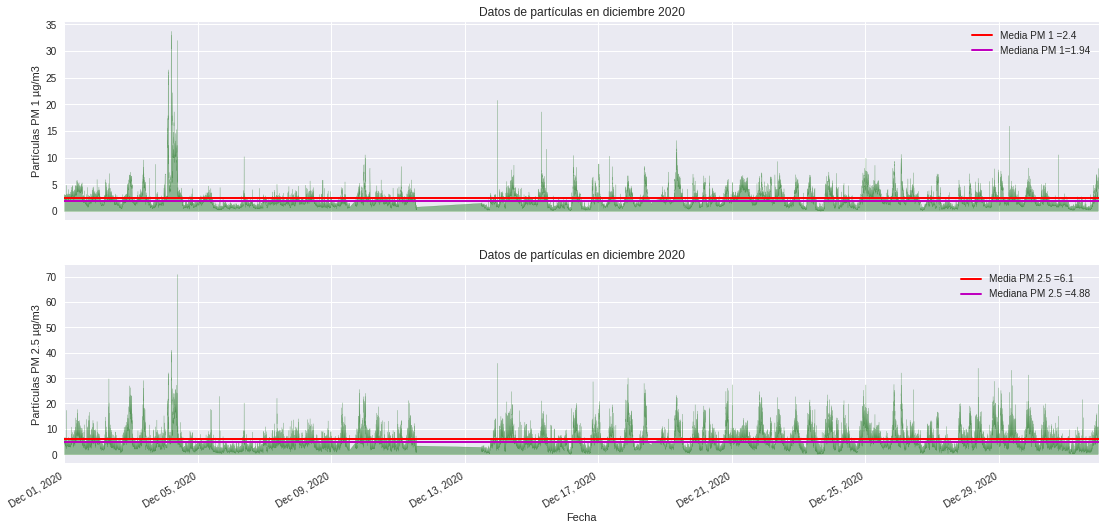

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))

ax1.plot_date(fecha_p_dic, pm1_dic, linewidth=0.15, marker=None)
ax1.axhline(pm1_dic.mean(), label=f'Media PM 1 ={round(pm1_dic.mean(),2)}', linewidth=2, color='r')
ax1.axhline(pm1_dic.median(), label=f'Mediana PM 1={round(pm1_dic.median(),2)}', linewidth=2, color='m')
ax1.fill_between(fecha_p_dic, pm1_dic, color='darkgreen', alpha=0.4)
ax1.set_title('Datos de partículas en diciembre 2020')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Partículas PM 1 µg/m3')
ax1.set_xlim([datetime(2020, 12, 1, 0, 0, 0), datetime(2020, 12, 31, 23, 59, 0)])
ax1.legend()

ax2.plot_date(fecha_p_dic, pm2_5_dic, linewidth=0.15, marker=None)
ax2.axhline(pm2_5_dic.mean(), label=f'Media PM 2.5 ={round(pm2_5_dic.mean(),2)}', linewidth=2, color='r')
ax2.axhline(pm2_5_dic.median(), label=f'Mediana PM 2.5 ={round(pm2_5_dic.median(),2)}', linewidth=2, color='m')
ax2.fill_between(fecha_p_dic, pm2_5_dic, color='darkgreen', alpha=0.4)
ax2.set_title('Datos de partículas en diciembre 2020')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Partículas PM 2.5 µg/m3')
ax2.set_xlim([datetime(2020, 12, 1, 0, 0, 0), datetime(2020, 12, 31, 23, 59, 0)])
ax2.legend()

ax3.plot_date(fecha_p_dic, pm10_dic, linewidth=0.15, marker=None)
ax3.axhline(pm10_dic.mean(), label=f'Media PM 2.5 ={round(pm10_dic.mean(),2)}', linewidth=2, color='r')
ax3.axhline(pm10_dic.median(), label=f'Mediana PM 2.5 ={round(pm10_dic.median(),2)}', linewidth=2, color='m')
ax3.fill_between(fecha_p_dic, pm10_dic, color='darkgreen', alpha=0.4)
ax3.set_title('Datos de partículas en diciembre 2020')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Partículas PM 10 µg/m3')
ax3.set_xlim([datetime(2020, 12, 1, 0, 0, 0), datetime(2020, 12, 31, 23, 59, 0)])
ax3.legend()

date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.grid(True)
fig.tight_layout(pad=3.0)
plt.show()

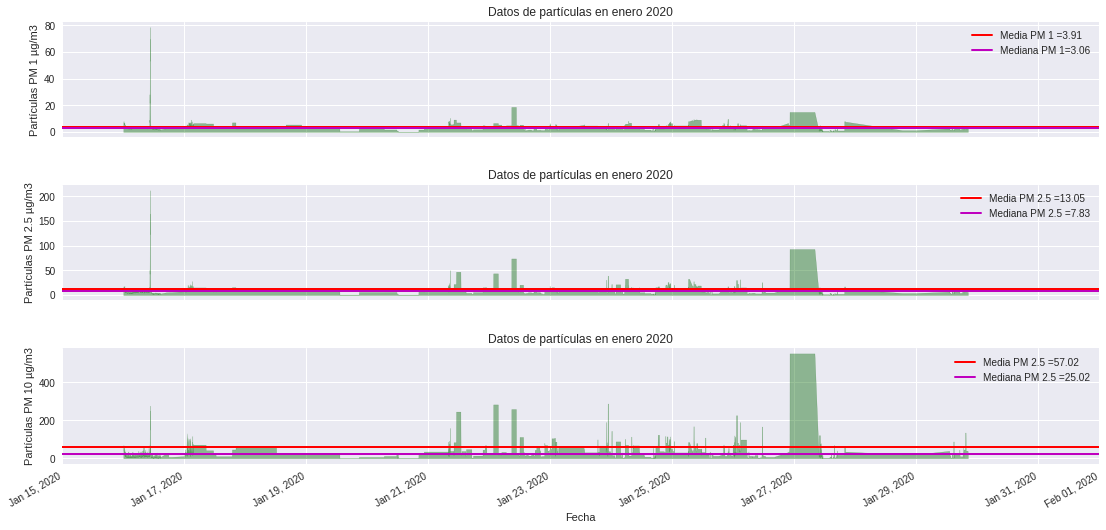

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

ax1.plot_date(fecha_p_ene, pm1_ene, linewidth=0.15, marker=None)
ax1.axhline(pm1_ene.mean(), label=f'Media PM 1 ={round(pm1_ene.mean(),2)}', linewidth=2, color='r')
ax1.axhline(pm1_ene.median(), label=f'Mediana PM 1={round(pm1_ene.median(),2)}', linewidth=2, color='m')
ax1.fill_between(fecha_p_ene, pm1_ene, color='darkgreen', alpha=0.4)
ax1.set_title('Datos de partículas en enero 2020')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Partículas PM 1 µg/m3')
ax1.set_xlim([datetime(2020, 1, 15, 0, 0, 0), datetime(2020, 2, 1, 0, 0, 0)])
ax1.legend()
#ax1.set_yscale('log')

ax2.plot_date(fecha_p_ene, pm2_5_ene, linewidth=0.15, marker=None)
ax2.axhline(pm2_5_ene.mean(), label=f'Media PM 2.5 ={round(pm2_5_ene.mean(),2)}', linewidth=2, color='r')
ax2.axhline(pm2_5_ene.median(), label=f'Mediana PM 2.5 ={round(pm2_5_ene.median(),2)}', linewidth=2, color='m')
ax2.fill_between(fecha_p_ene, pm2_5_ene, color='darkgreen', alpha=0.4)
ax2.set_title('Datos de partículas en enero 2020')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Partículas PM 2.5 µg/m3')
ax2.set_xlim([datetime(2020, 1, 15, 0, 0, 0), datetime(2020, 2, 1, 0, 0, 0)])
ax2.legend()
#ax2.set_yscale('log')

ax3.plot_date(fecha_p_ene, pm10_ene, linewidth=0.15, marker=None)
ax3.axhline(pm10_ene.mean(), label=f'Media PM 2.5 ={round(pm10_ene.mean(),2)}', linewidth=2, color='r')
ax3.axhline(pm10_ene.median(), label=f'Mediana PM 2.5 ={round(pm10_ene.median(),2)}', linewidth=2, color='m')
ax3.fill_between(fecha_p_ene, pm10_ene, color='darkgreen', alpha=0.4)
ax3.set_title('Datos de partículas en enero 2020')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Partículas PM 10 µg/m3')
ax3.set_xlim([datetime(2020, 1, 15, 0, 0, 0), datetime(2020, 2, 1, 0, 0, 0)])
ax3.legend()
#ax3.set_yscale('log')

date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.grid(True)
fig.tight_layout(pad=3.0)
plt.show()

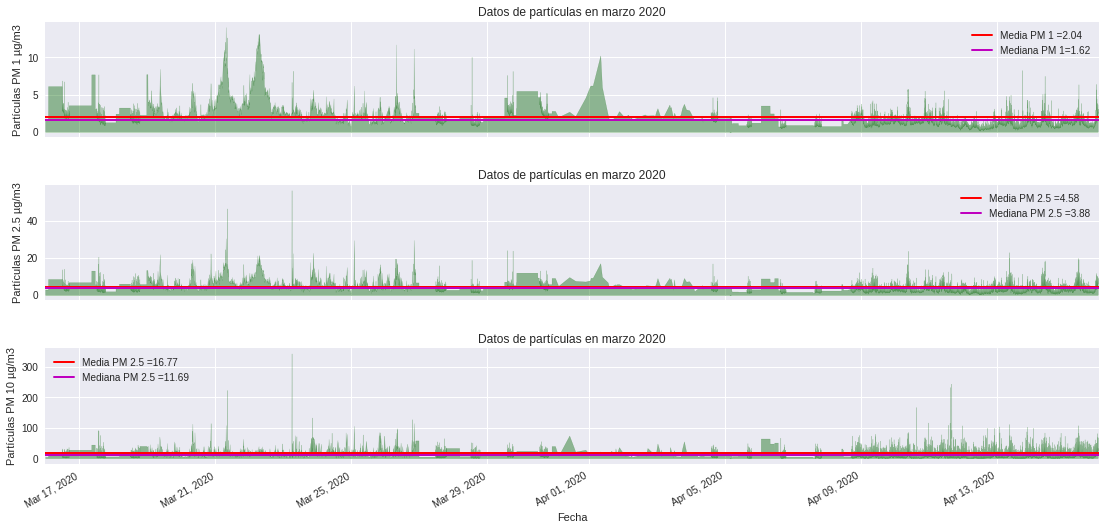

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

ax1.plot_date(fecha_p_mar, pm1_mar, linewidth=0.15, marker=None)
ax1.axhline(pm1_mar.mean(), label=f'Media PM 1 ={round(pm1_mar.mean(),2)}', linewidth=2, color='r')
ax1.axhline(pm1_mar.median(), label=f'Mediana PM 1={round(pm1_mar.median(),2)}', linewidth=2, color='m')
ax1.fill_between(fecha_p_mar, pm1_mar, color='darkgreen', alpha=0.4)
ax1.set_title('Datos de partículas en marzo 2020')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Partículas PM 1 µg/m3')
ax1.set_xlim([datetime(2020, 3, 16, 0, 0, 0), datetime(2020, 4, 16, 0, 0, 0)])
ax1.legend()
#ax1.set_yscale('log')

ax2.plot_date(fecha_p_mar, pm2_5_mar, linewidth=0.15, marker=None)
ax2.axhline(pm2_5_mar.mean(), label=f'Media PM 2.5 ={round(pm2_5_mar.mean(),2)}', linewidth=2, color='r')
ax2.axhline(pm2_5_mar.median(), label=f'Mediana PM 2.5 ={round(pm2_5_mar.median(),2)}', linewidth=2, color='m')
ax2.fill_between(fecha_p_mar, pm2_5_mar, color='darkgreen', alpha=0.4)
ax2.set_title('Datos de partículas en marzo 2020')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Partículas PM 2.5 µg/m3')
ax2.set_xlim([datetime(2020, 3, 16, 0, 0, 0), datetime(2020, 4, 16, 0, 0, 0)])
ax2.legend()
#ax2.set_yscale('log')

ax3.plot_date(fecha_p_mar, pm10_mar, linewidth=0.15, marker=None)
ax3.axhline(pm10_mar.mean(), label=f'Media PM 2.5 ={round(pm10_mar.mean(),2)}', linewidth=2, color='r')
ax3.axhline(pm10_mar.median(), label=f'Mediana PM 2.5 ={round(pm10_mar.median(),2)}', linewidth=2, color='m')
ax3.fill_between(fecha_p_mar, pm10_mar, color='darkgreen', alpha=0.4)
ax3.set_title('Datos de partículas en marzo 2020')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Partículas PM 10 µg/m3')
ax3.set_xlim([datetime(2020, 3, 16, 0, 0, 0), datetime(2020, 4, 16, 0, 0, 0)])
ax3.legend()
#ax3.set_yscale('log')

date_format = mpl_dates.DateFormatter('%b %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.grid(True)
fig.tight_layout(pad=3.0)
plt.show()

### 4.2 Forma eficiente aunque un poco más complicada

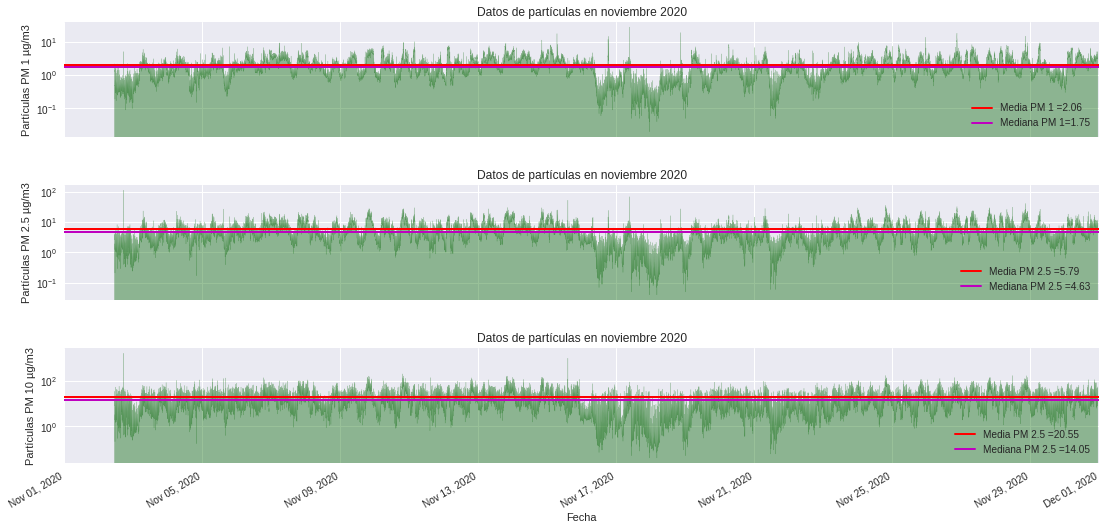

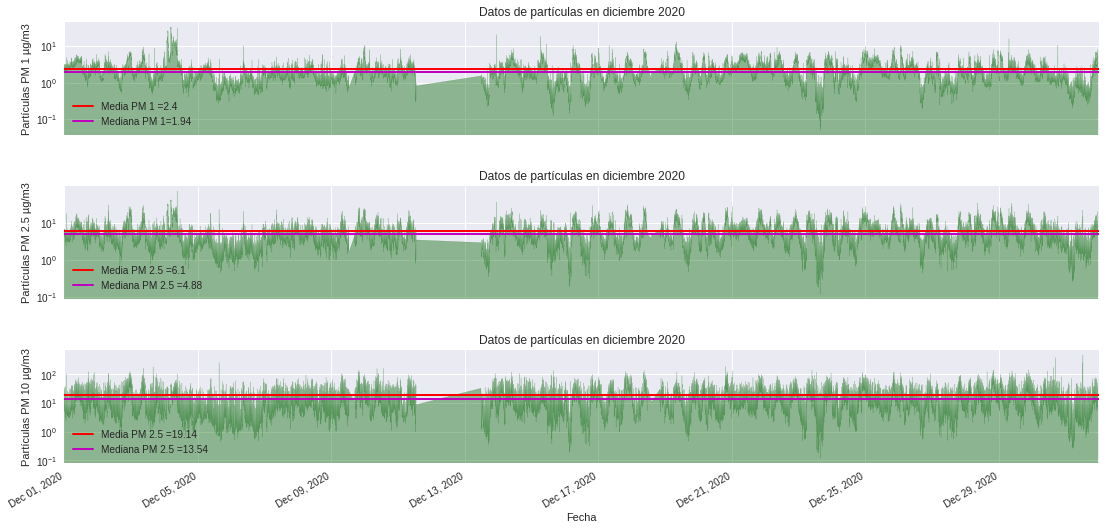

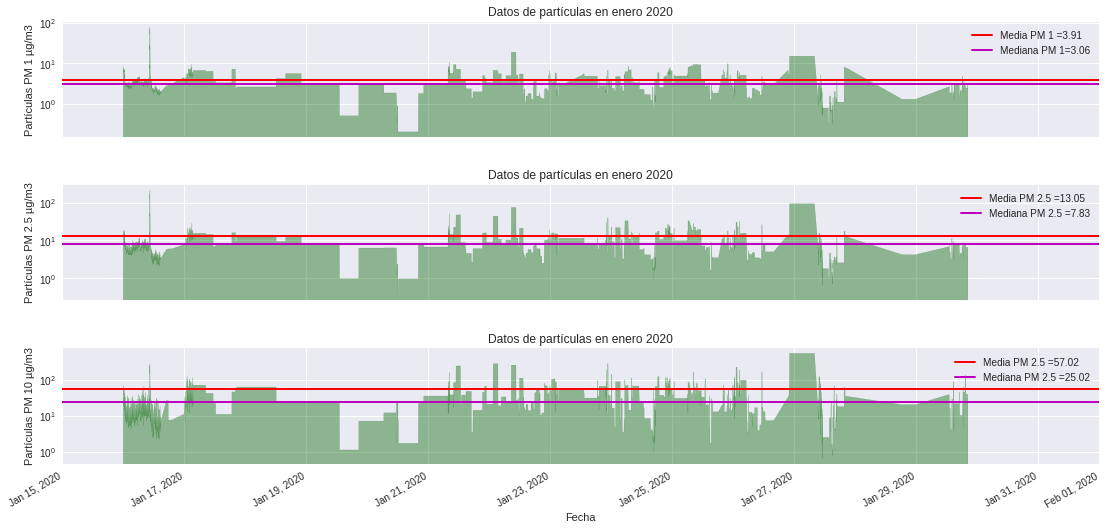

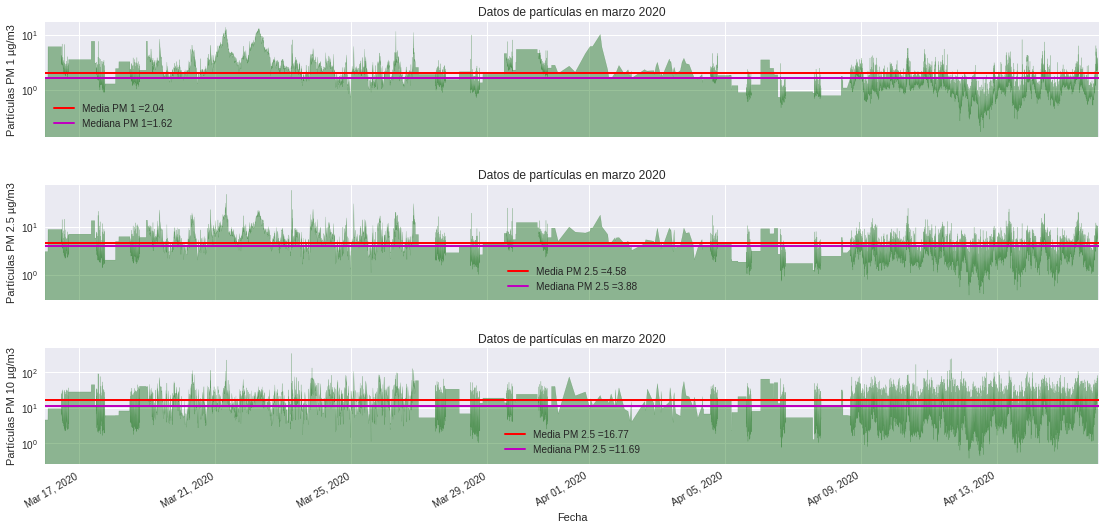

In [28]:
fechas = [fecha_p_nov, fecha_p_dic, fecha_p_ene, fecha_p_mar]
pm1_ls = [pm1_nov, pm1_dic, pm1_ene, pm1_mar]
pm2_5_ls = [pm2_5_nov, pm2_5_dic, pm2_5_ene, pm2_5_mar]
pm10_ls = [pm10_nov, pm10_dic, pm10_ene, pm10_mar]
mes = ['noviembre', 'diciembre', 'enero', 'marzo']
timestamp_start = [datetime(2020, 11, 1, 0, 0, 0), datetime(2020, 12, 1, 0, 0, 0), datetime(2020, 1, 15, 0, 0, 0), datetime(2020, 3, 16, 0, 0, 0)]
timestamp_finish = [datetime(2020, 12, 1, 0, 0, 0), datetime(2020, 12, 31, 23, 59, 0), datetime(2020, 2, 1, 0, 0, 0), datetime(2020, 4, 16, 0, 0, 0)]

for i in range(len(fechas)):
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

  ax1.plot_date(fechas[i], pm1_ls[i], linewidth=0.15, marker=None)
  ax1.axhline(pm1_ls[i].mean(), label=f'Media PM 1 ={round(pm1_ls[i].mean(),2)}', linewidth=2, color='r')
  ax1.axhline(pm1_ls[i].median(), label=f'Mediana PM 1={round(pm1_ls[i].median(),2)}', linewidth=2, color='m')
  ax1.fill_between(fechas[i], pm1_ls[i], color='darkgreen', alpha=0.4)
  ax1.set_title(f'Datos de partículas en {mes[i]} 2020')
  ax1.set_xlabel('Fecha')
  ax1.set_ylabel('Partículas PM 1 µg/m3')
  ax1.set_xlim([timestamp_start[i], timestamp_finish[i]])
  ax1.legend()
  ax1.set_yscale('log')

  ax2.plot_date(fechas[i], pm2_5_ls[i], linewidth=0.15, marker=None)
  ax2.axhline(pm2_5_ls[i].mean(), label=f'Media PM 2.5 ={round(pm2_5_ls[i].mean(),2)}', linewidth=2, color='r')
  ax2.axhline(pm2_5_ls[i].median(), label=f'Mediana PM 2.5 ={round(pm2_5_ls[i].median(),2)}', linewidth=2, color='m')
  ax2.fill_between(fechas[i], pm2_5_ls[i], color='darkgreen', alpha=0.4)
  ax2.set_title(f'Datos de partículas en {mes[i]} 2020')
  ax2.set_xlabel('Fecha')
  ax2.set_ylabel('Partículas PM 2.5 µg/m3')
  ax2.set_xlim([timestamp_start[i], timestamp_finish[i]])
  ax2.legend()
  ax2.set_yscale('log')

  ax3.plot_date(fechas[i], pm10_ls[i], linewidth=0.15, marker=None)
  ax3.axhline(pm10_ls[i].mean(), label=f'Media PM 2.5 ={round(pm10_ls[i].mean(),2)}', linewidth=2, color='r')
  ax3.axhline(pm10_ls[i].median(), label=f'Mediana PM 2.5 ={round(pm10_ls[i].median(),2)}', linewidth=2, color='m')
  ax3.fill_between(fechas[i], pm10_ls[i], color='darkgreen', alpha=0.4)
  ax3.set_title(f'Datos de partículas en {mes[i]} 2020')
  ax3.set_xlabel('Fecha')
  ax3.set_ylabel('Partículas PM 10 µg/m3')
  ax3.set_xlim([timestamp_start[i], timestamp_finish[i]])
  ax3.legend()
  ax3.set_yscale('log')

  date_format = mpl_dates.DateFormatter('%b %d, %Y')
  plt.gca().xaxis.set_major_formatter(date_format)
  plt.gcf().autofmt_xdate()
  plt.grid(True)
  fig.tight_layout(pad=3.0)
  plt.show()

Cambiemos de estilo

In [29]:
plt.style.use('bmh')

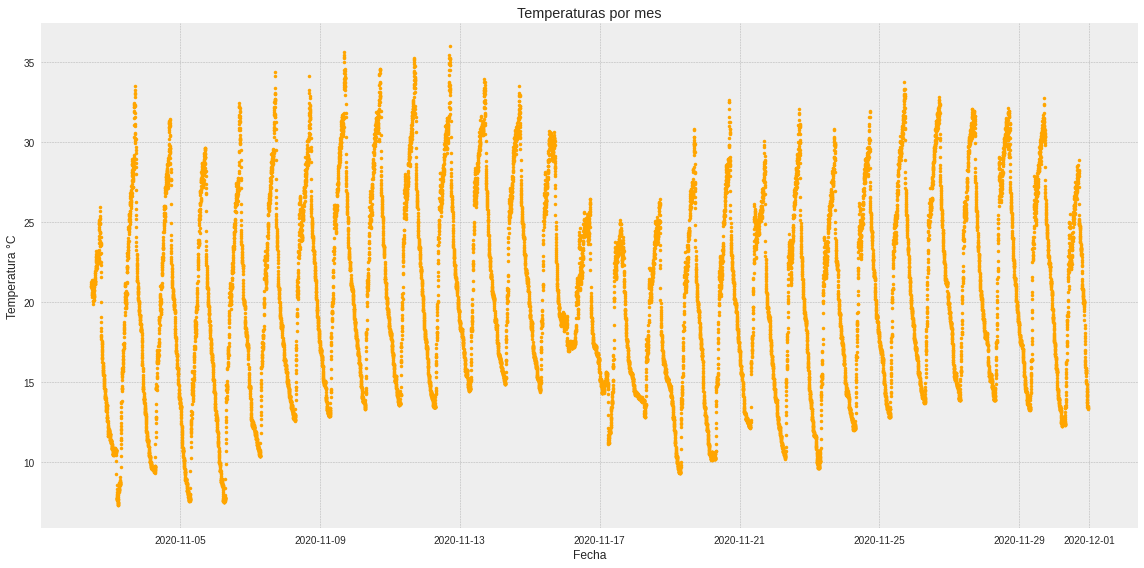

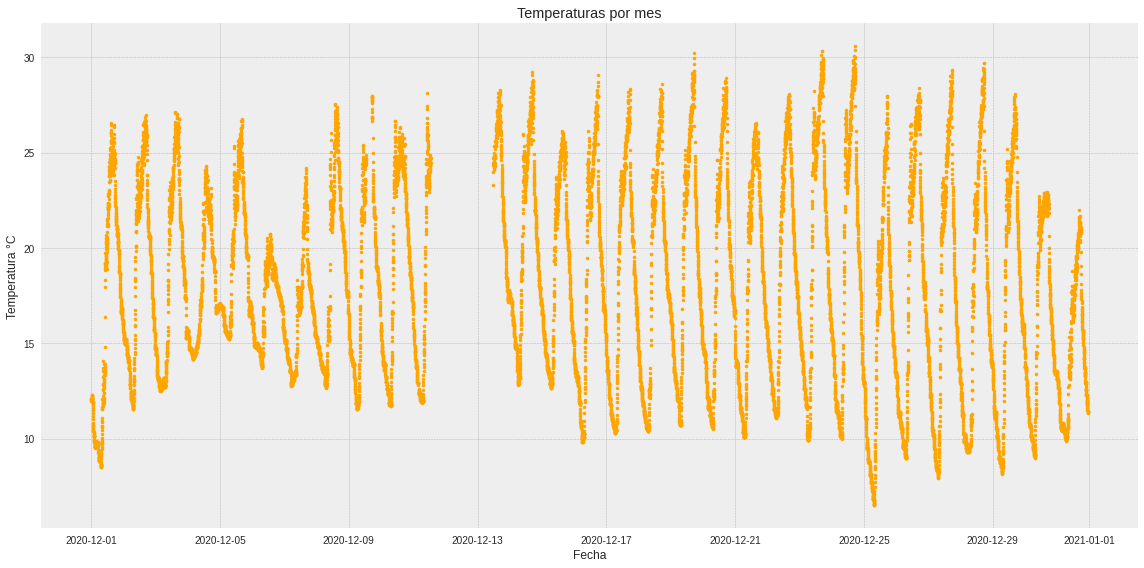

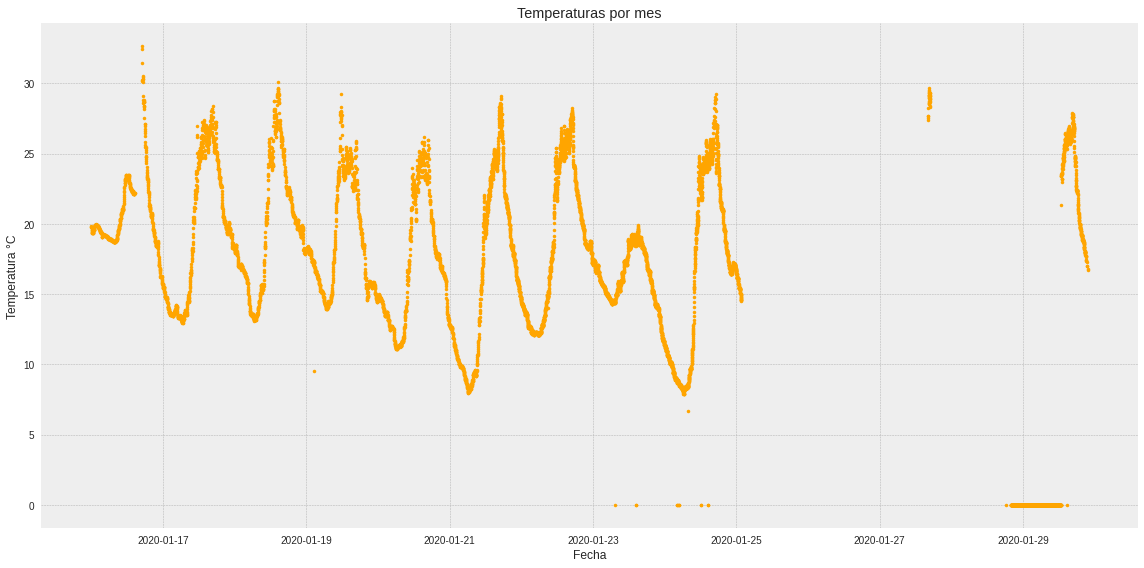

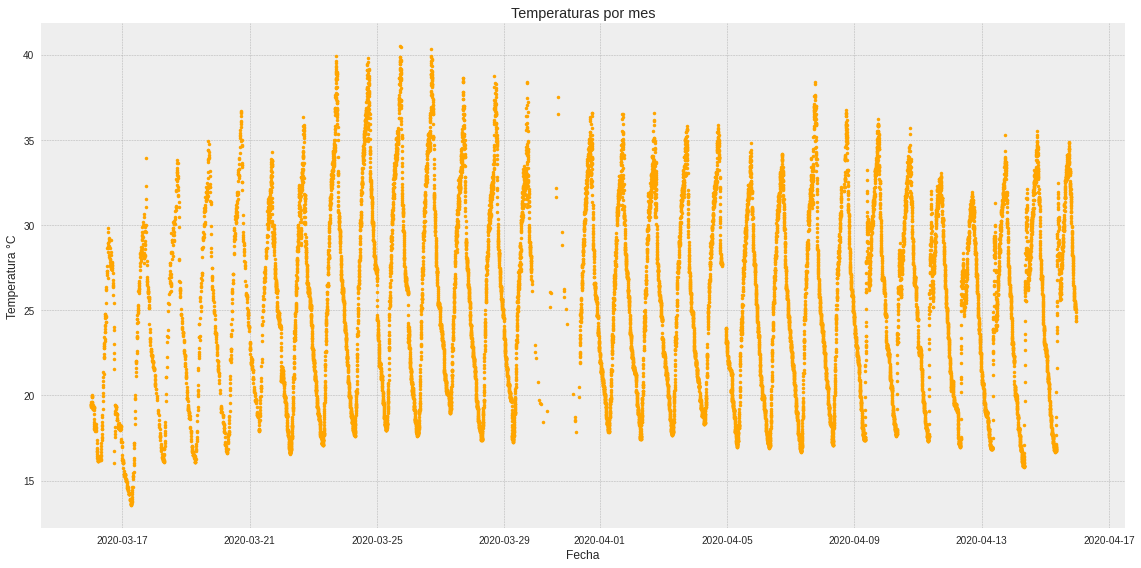

In [30]:
fechas2 = [fecha_c_nov, fecha_c_dic, fecha_c_ene, fecha_c_mar]
temps = [temp_nov, temp_dic, temp_ene, temp_mar]

for i in range(len(fechas2)):
  plt.figure(figsize=(16,8))
  plt.plot_date(fechas2[i],temps[i], marker='.', color='orange')
  plt.grid(True)
  plt.title('Temperaturas por mes')
  plt.xlabel('Fecha')
  plt.ylabel('Temperatura °C')
  plt.tight_layout()
  plt.show()

Cambiemos de estilo otra vez

In [31]:
plt.style.use('ggplot')

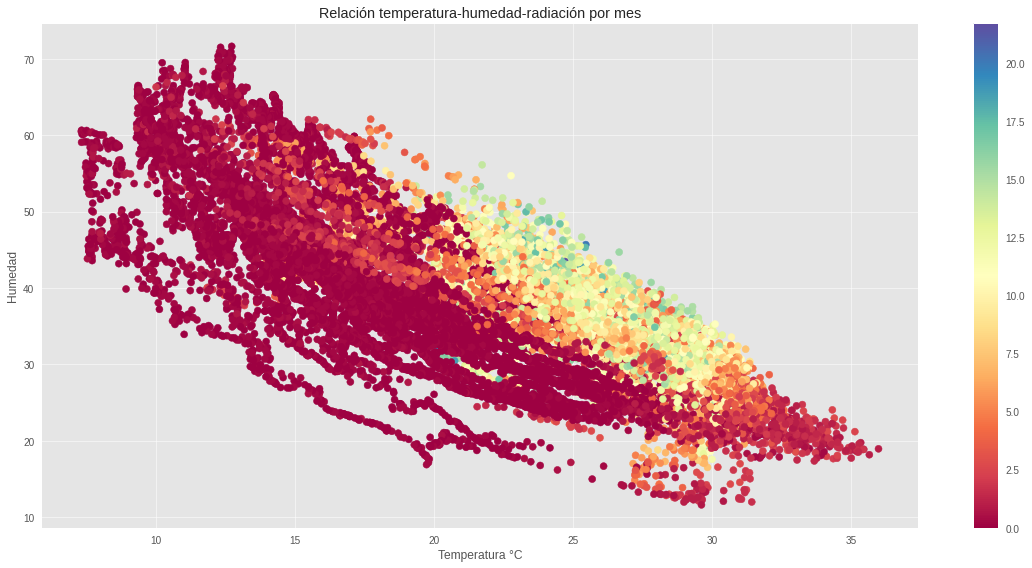

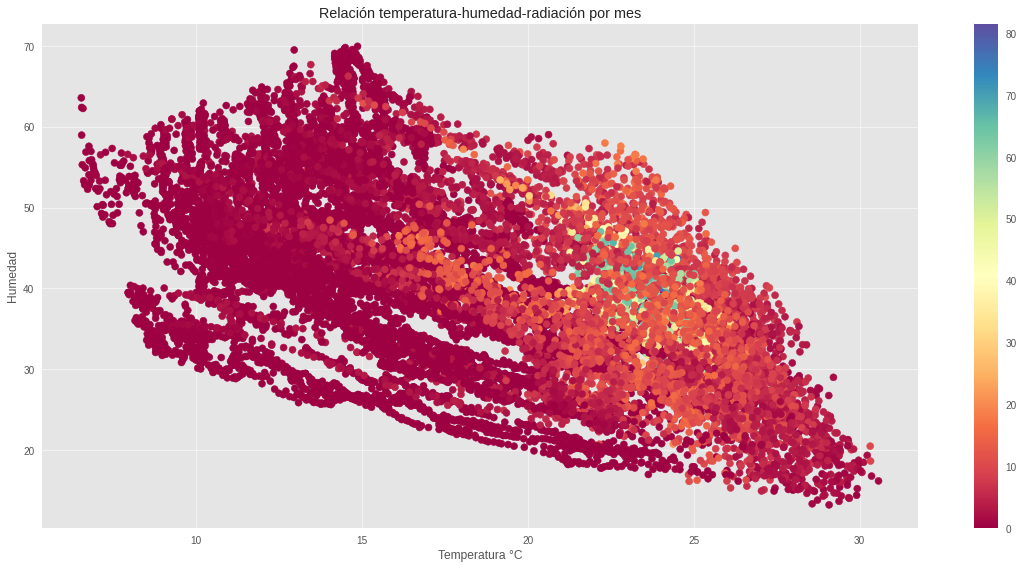

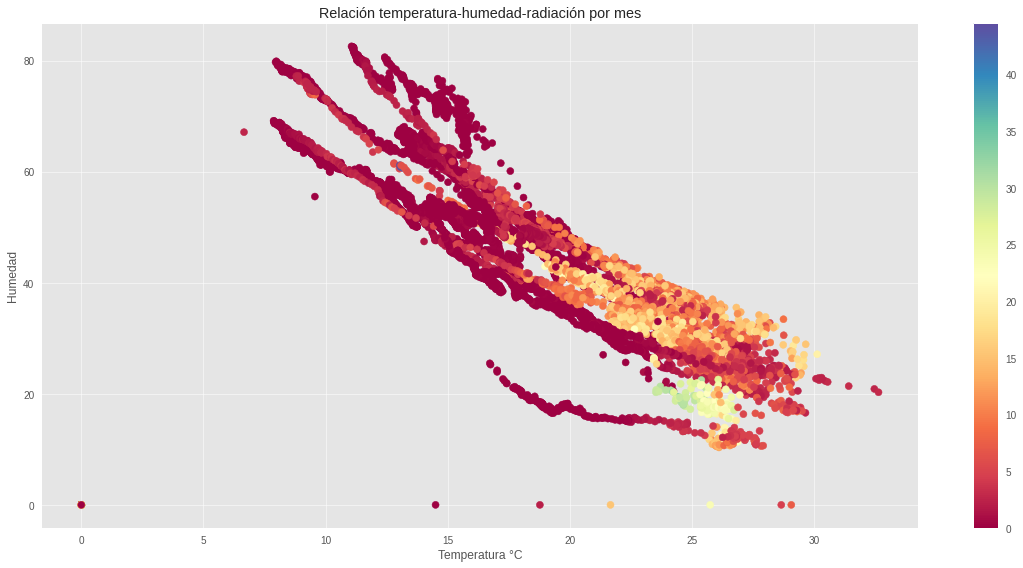

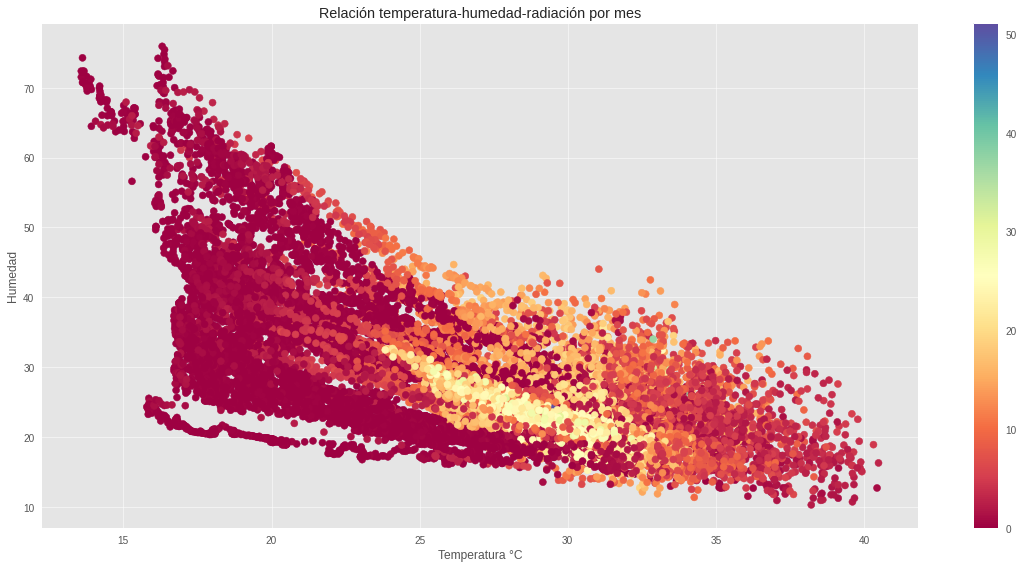

In [32]:
rads = [rad_nov, rad_dic, rad_ene, rad_mar]
humeds = [humed_nov, humed_dic, humed_ene, humed_mar]

for i in range(len(fechas2)):
  plt.figure(figsize=(16,8))
  plt.scatter(temps[i], humeds[i], c = rads[i], cmap='Spectral')
  plt.grid(True)
  plt.title('Relación temperatura-humedad-radiación por mes')
  plt.xlabel('Temperatura °C')
  plt.ylabel('Humedad')
  plt.tight_layout()
  plt.colorbar()
  plt.show()

In [33]:
plt.style.use('fivethirtyeight')

In [34]:
counter = Counter()
for row in direccion_nov:
  counter.update(row.split(','))
print(counter)

direcciones = []
val = []
for item in counter.most_common(len(counter)):
  direcciones.append(item[0])
  val.append(item[1])
print(direcciones)
print(val)
direcciones.reverse()
val.reverse()

Counter({'Noroeste': 2627, 'Oeste': 2225, 'Suroeste': 1772, 'Este': 1692, 'Sur': 1538, 'Sureste': 1519, 'Este-Sureste': 1132, 'Norte': 870, 'Oeste-Suroeste': 831, 'Nor-Noroeste': 827, 'Oeste-Noroeste': 766, 'Sur-Suroeste': 551, 'Sur-Sureste': 550, 'Noreste': 370, 'Este-Noreste': 281, 'Nor-Noreste': 154})
['Noroeste', 'Oeste', 'Suroeste', 'Este', 'Sur', 'Sureste', 'Este-Sureste', 'Norte', 'Oeste-Suroeste', 'Nor-Noroeste', 'Oeste-Noroeste', 'Sur-Suroeste', 'Sur-Sureste', 'Noreste', 'Este-Noreste', 'Nor-Noreste']
[2627, 2225, 1772, 1692, 1538, 1519, 1132, 870, 831, 827, 766, 551, 550, 370, 281, 154]


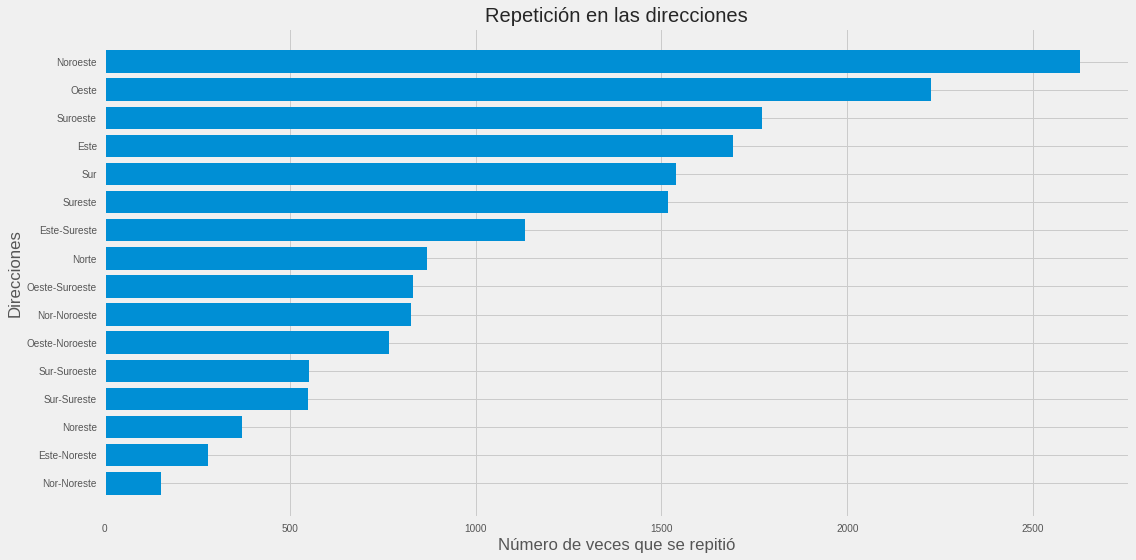

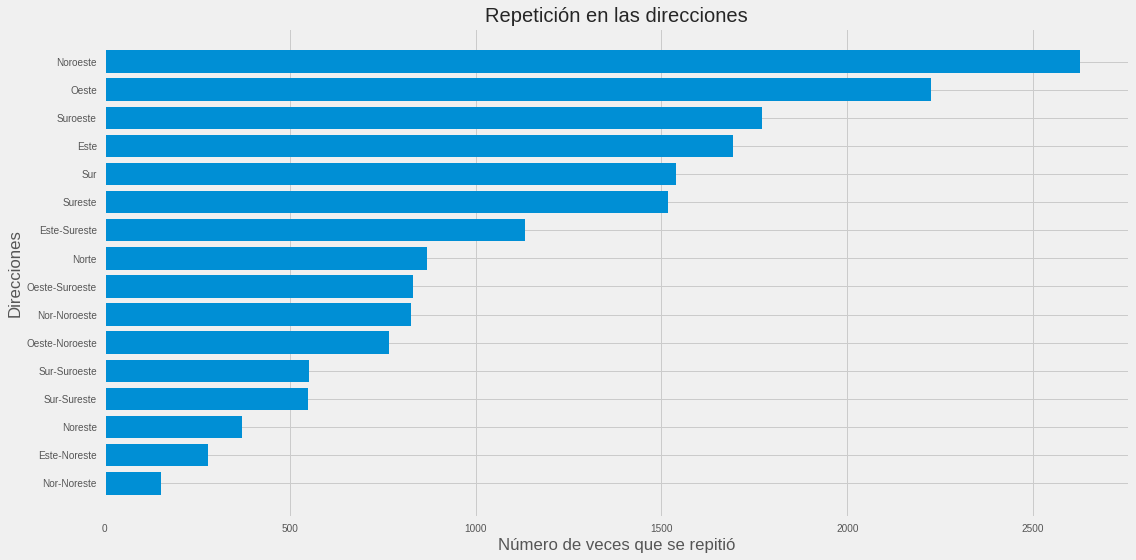

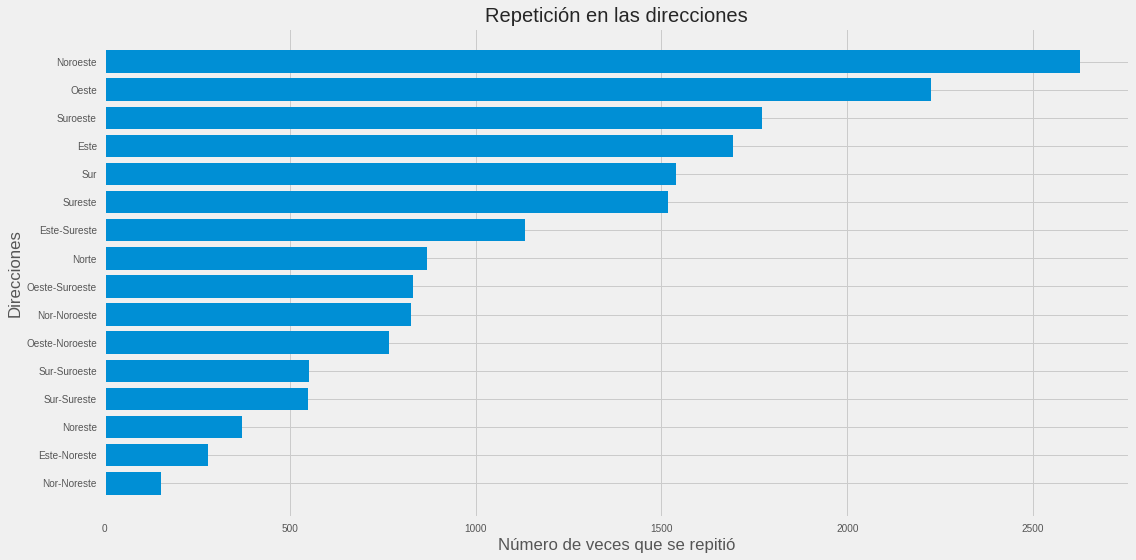

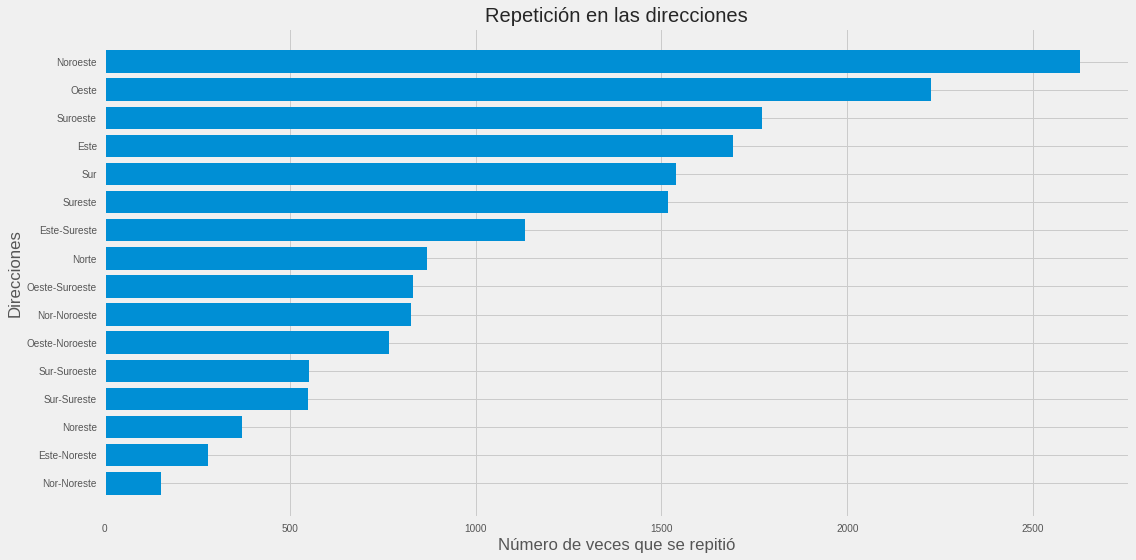

In [35]:
direcciones_viento = [direccion_nov, direccion_dic, direccion_ene, direccion_mar]
for mes in direcciones_viento:
  plt.figure(figsize=(16,8))
  plt.barh(direcciones,val)
  plt.title('Repetición en las direcciones')
  plt.xlabel('Número de veces que se repitió')
  plt.ylabel('Direcciones')
  plt.tight_layout()